Introduction:

Let's assume that we're working for an an e-learning company that offers courses on programming. 

Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. 

Our goal in this project is to find out the two best markets to advertise our product in.

In [69]:
import pandas as pd
import numpy as np

In [70]:
# loading our data
sdata = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory = False)

In [71]:
# checking number of rows and columns
print(sdata.shape)


(18175, 136)


In [72]:
#printing first 5 rows
sdata.iloc[0:5]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# investigating the columns to isolate our columns if interest
sdata.columns.tolist()


['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

1. In order to find the best markets to advertise our products in, we could do surveys for different markets to understand consumer interest. However, this willbe costly. So let's use existing data from  freeCodeCamp's 2017 New Coder Survey. 

2. freeCodeCamp is a free e-learning platform that offers courses on web development and their survery attracted coders from varios backgrounds.

3. Survey details: https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969

4. Data Source: https://github.com/freeCodeCamp/2017-new-coder-survey

We are looking for coders who are interested in areas other than web development (data science, game development, video). We will try to answer the following initial questions to see whether the sample we have is representative for our population of interest.

Where are these new coders located.
What are the locations with the greatest number of new coders.
How much money new coders are willing to spend on learning.

The JobRoleInterest column describes for every participant the role they'd be interested in working. Lets generate a frequency table for this column.


In [74]:
# generating a frequency table as percentages
sdata['JobRoleInterest'].value_counts(normalize = True) * 100


Full-Stack Web Developer                                                                                                                                                                                                 11.770595
  Front-End Web Developer                                                                                                                                                                                                 6.435927
  Data Scientist                                                                                                                                                                                                          2.173913
Back-End Web Developer                                                                                                                                                                                                    2.030892
  Mobile Developer                                                                          

From the frequency table we can see that majority of the sample is interested in Web development. Some people are interested in Data Science and some are interested in game, information security and so on. 
Alot of people are interested in more than one subject as well. 
To figure out how many people are interested in atleast one of web or mobile development, lets split the JobRoleInterest column.



In [75]:
# removing null values and splitting
data_drop = sdata['JobRoleInterest'].dropna()
job_interests = data_drop.str.split(',')



In [76]:
# generating a frequency table to determine how many people know what they want from the program 
options = job_interests.apply(lambda x: len(x))
options.value_counts(normalize = True).sort_index() * 100



1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

We can see that 31% of the people are interested in one subject. Majority of them have mixed interests. Since we are interested in finding consumer interest in other areas, it is a good sign for us to go ahead with this data set. 

In [77]:
# finding how many people are interested in atleast one of web or mobile development by looking for the string web or mobile in job_interests
web_mobile = data_drop.str.contains('Web | Mobile')
counts = web_mobile.value_counts(normalize = True )*100
print(counts)


True     86.298627
False    13.701373
Name: JobRoleInterest, dtype: float64


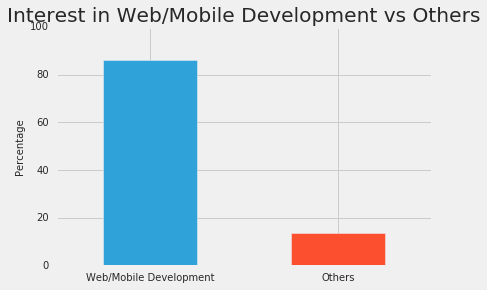

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

counts.plot.bar()
plt.title('Interest in Web/Mobile Development vs Others') # y pads the title upward
plt.ylabel('Percentage', fontsize = 10)
plt.xticks([0,1],['Web/Mobile Development', 'Others'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

We can see that more than 80% of the people are interested in atleast one of Mobile or Web Development.

Next we will find the number and location of these coders.

One column in our dataset can be used to figure out the location :
 'CountryLive'
 
Lets try to find out which countries have the maximum number of coders interested in learning these subjects.

In [79]:
# dropping rows with null answers and finding absolute and relative frequencies
country = sdata[sdata['JobRoleInterest'].notnull()]
country_freq_rel = country['CountryLive'].value_counts(normalize = True )*100
pd.DataFrame(data = {'Relative frequency (%)': country_freq_rel})

,Relative frequency (%)
United States of America,45.700497
India,7.721556
United Kingdom,4.606610
Canada,3.802281
Poland,1.915765
Brazil,1.886517
Germany,1.828020
Australia,1.637906
Russia,1.491664
Ukraine,1.301550


We can see that the top two markets to advertise in our United States of America with 45.7% and India with 7.7%. The difference in the two markets is significant, and we should dig a little bit deeper to understand this gap. 

Lets figure out how much money these coders are willing to spend, to find the most profitable market.

The MoneyForLearning column describes the amount of money spent by participants to date on coding in USD. 

Since the cost of our subscription in $59 per month, it makes sense to figure out if people are willing to spend more than or equal to this amount.  

We can focus our analysis on the top four countries with the highest frequencies: the US, India, the United Kingdom, and Canada.

In [89]:
# Replace 0s to avoid answers where people have just started coding with 1s to avoid division by 0
country['MonthsProgramming'].replace(0,1, inplace = True)

#creating a column and finding the amount per month people are willing to spend on coding
country['moneypermonth'] = country['MoneyForLearning'] / country['MonthsProgramming']
country['moneypermonth'].isnull().sum()

0

In [90]:
# finding number of null values in new column
country = country[country['moneypermonth'].notnull()]

#removing rows with null values
country = country[country['CountryLive'].notnull()]



In [91]:
# grouping the data by CountryLive to find out how much money people are spending on learning
countries_mean = country.groupby('CountryLive').mean()
countries_mean['moneypermonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]



CountryLive
United States of America    106.521992
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: moneypermonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


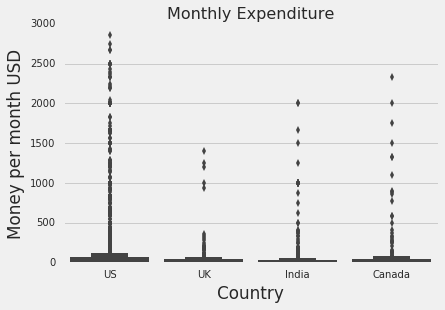

In [92]:
#using boxplots to identify outliers for the top 4 countries
top_4 = country[country['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

import seaborn as sns
sns.boxplot(y = 'moneypermonth', x = 'CountryLive',
            data = top_4)
plt.title('Monthly Expenditure',
         fontsize = 16)
plt.ylabel('Money per month USD')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [84]:
# removing outliers
country = country[country['moneypermonth'] < 20000]


In [85]:
# recalculating the mean
countries_mean = country.groupby('CountryLive').mean()
countries_mean['moneypermonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]


CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: moneypermonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


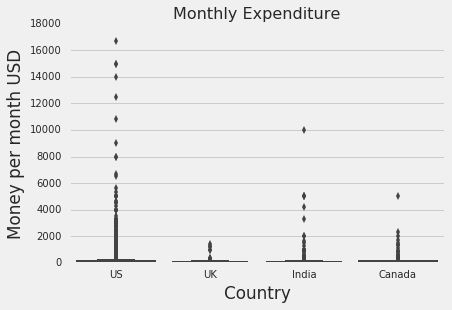

In [86]:
top_4 = country[country['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

sns.boxplot(y = 'moneypermonth', x = 'CountryLive',
            data = top_4)
plt.title('Monthly Expenditure',
         fontsize = 16)
plt.ylabel('Money per month USD')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()






We can see that customers are willing to pay the most in Canada and India. Before finalizaing these as the best markets, lets find out the number of potential customers in each country. 

We can also spot some outliers for the US(2000-17000/month), India (10000/month), and Canada (5000/month). Let's eliminate the outliers by only selecting expenditures less than 3000 and recompute the means.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


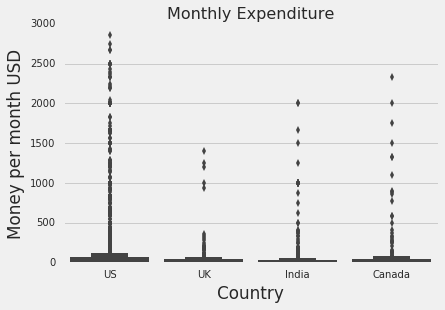

In [87]:
#removing outliers
country = country[country['moneypermonth'] < 3000]
#recomputing the means
countries_mean = country.groupby('CountryLive').mean()
countries_mean['moneypermonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]
#selecting top 4 countries
top_4 = country[country['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# box plot 
sns.boxplot(y = 'moneypermonth', x = 'CountryLive',
            data = top_4)
plt.title('Monthly Expenditure',
         fontsize = 16)
plt.ylabel('Money per month USD')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()




Now we can finally conclude that US and Canada seem like the best markets to advertise in, since the people there are willing to spend the most on learning. 

However the amount of money that Canadians are willing to pay ($113.5) for E-learning does not differ significantly from what Indians are willing to pay ($135.1). 

To choose the second best market, we must examine the number of potential customers for both the countries for maximizing profit and allocating budget respectively. Since we don't have enough data for that, we can choose to advertise in US only for now.

